Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


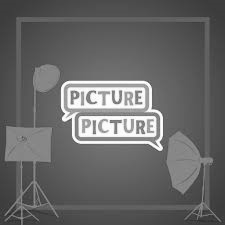

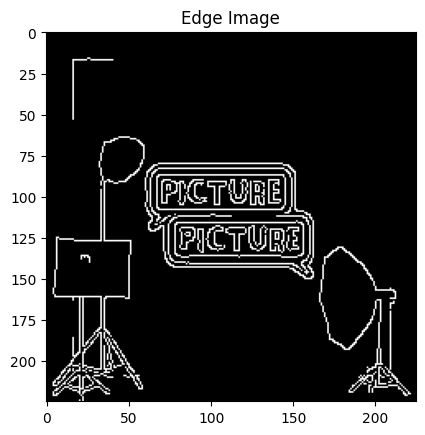

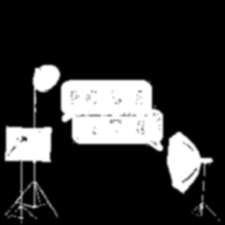

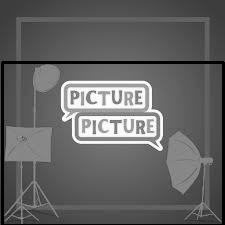

运行时间：0.504190秒
检测到文本: PICTURE
PICTURE
文本检测准确率: 93.33%


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
!sudo apt-get install -y tesseract-ocr libtesseract-dev
!pip install pytesseract opencv-python
!pip install opencv-python
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf #引入库
import pytesseract
from PIL import Image
import time
start_time = time.time()
# 读取图片
img_path = '/content/drive/My Drive/image/picture.jpg'  # 确保路径正确
image = cv2.imread(img_path)
cv2.imread(img_path)

#灰度化图片
image = cv2.imread('/content/drive/My Drive/image/picture.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
#边缘检测
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.show()

# 阈值化
_,threshold_images = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)#_：返回值（阈值），在这里我们不需要使用，所以用下划线表示忽略。
#120：阈值，像素值高于此值的像素将被设置为最大值（255），低于此值的像素将被设置为 0。
#255：最大值，表示在二值图像中白色的像素值。 cv2.THRESH_BINARY：阈值类型，表示使用二值化处理。高于阈值的像素设置为最大值，低于阈值的像素设置为 0。
#threshold_images = cv2.medianBlur(threshold_images, 3)#使用中值滤波来降低噪声
threshold_images = cv2.GaussianBlur(threshold_images, (5, 5), 0)
#使用高斯滤波来与中值滤波来比较
#(5, 5)：这是高斯核的大小，必须是奇数。可以根据需要调整大小，以控制模糊程度。
#0：表示自动计算标准差。如果设置为其他值，可以手动指定高斯核的标准差。
cv2_imshow(threshold_images)

#使用Tesseract检测文本区域
dilated = cv2.dilate(threshold_images, None, iterations=1)#对二值化图像进行膨胀操作，膨胀可以帮助连接图像中的小断裂或噪声，使得对象更加连贯
(contours, _) = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#从膨胀后的图像中检测轮廓
#dilated：这是输入图像，通常是经过膨胀处理的二值化图像。在此图像中，前景（通常是白色部分）和背景（通常是黑色部分）是明显的。
#cv2.RETR_EXTERNAL：这是轮廓检索模式。RETR_EXTERNAL 表示只检索最外层的轮廓，忽略内部轮廓.
#cv2.CHAIN_APPROX_SIMPLE：这是轮廓逼近方法。CHAIN_APPROX_SIMPLE 表示只保留轮廓的端点，从而减少存储的点的数量，适用于大多数情况。

detected_text = ""

# 遍历每个轮廓以提取文本区域
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # 过滤掉小的轮廓
    if w > 50 and h > 20:  # 可以根据需要调整大小
        roi = gray_image[y:y+h, x:x+w]#使用灰度图像提高对比度，减少噪声
        #绘制矩形框
        cv2.rectangle(gray_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


# 显示结果图像
cv2_imshow(gray_image)#显示出绘制好了矩形框的灰度化图像

#使用 Tesseract OCR 引擎从图像中提取文本
text = pytesseract.image_to_string(roi, lang='eng', config='--psm 6')#roi检测出包含文本的区域
end_time = time.time()
detected_text += text + "\n"
print(f"运行时间：{end_time-start_time:2f}秒")
print(f"检测到文本: {text.strip()}")
true_text = "PICTURE PICTURE"  # 这里填入实际的文本
accuracy = sum(1 for a, b in zip(detected_text, true_text) if a == b) / len(true_text)
print(f"文本检测准确率: {accuracy:.2%}")